# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# The URL with the Key   
url = (f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}")

In [10]:

city_data = []

# Print begining statement
print("Beginning Data Retrieval")
print("-----------------------------")

# Record tracker
record = 1

#Loop through the API
for city in cities:
    city_url = (f"{url}&q={city}")
    try:
        city_weather = requests.get(city_url).json()
        country = city_weather["sys"]["country"]
        date = city_weather["dt"]
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather["coord"]["lon"]
        city_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_cloudiness = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_data.append({"City":city,
                          "Cloudiness":city_cloudiness,
                          "Country": country,
                          "Date": date,
                          "Humidity":city_humidity,
                          "Lat":city_lat,
                          "Lng":city_lng,
                          "Max Temp":city_temp,
                          "Wind Speed":city_wind,
                          })
        print(f"Processing Record {record} | {city}")
    
        # Increase counter by one 
        record = record + 1
    # Skip if there is no record of the city
    except:
        print("City not found. Skipping...")
        pass

# Print the finishing statement
print("-----------------------------") 
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | naujoji akmene
City not found. Skipping...
City not found. Skipping...
Processing Record 2 | kapaa
City not found. Skipping...
Processing Record 3 | hilo
Processing Record 4 | pevek
Processing Record 5 | la concordia
Processing Record 6 | punta arenas
Processing Record 7 | vila velha
Processing Record 8 | souillac
Processing Record 9 | hithadhoo
Processing Record 10 | muzhi
Processing Record 11 | alofi
Processing Record 12 | sambava
Processing Record 13 | sept-iles
Processing Record 14 | hermanus
Processing Record 15 | chuy
Processing Record 16 | puerto madryn
Processing Record 17 | manakara
Processing Record 18 | portland
Processing Record 19 | cape town
Processing Record 20 | port alfred
Processing Record 21 | puerto ayora
Processing Record 22 | mataura
Processing Record 23 | bonavista
Processing Record 24 | lavrentiya
Processing Record 25 | cherskiy
Processing Record 26 | seoni
City not found. Skipping...
P

Processing Record 233 | new norfolk
Processing Record 234 | marquette
Processing Record 235 | derzhavinsk
Processing Record 236 | celina
City not found. Skipping...
City not found. Skipping...
Processing Record 237 | constitucion
Processing Record 238 | chapais
Processing Record 239 | kasongo
Processing Record 240 | provideniya
Processing Record 241 | henties bay
Processing Record 242 | nantucket
Processing Record 243 | luwuk
Processing Record 244 | mount gambier
Processing Record 245 | brae
Processing Record 246 | karla
Processing Record 247 | leningradskiy
Processing Record 248 | madang
Processing Record 249 | sabancuy
Processing Record 250 | cidreira
Processing Record 251 | russell
Processing Record 252 | cockburn town
Processing Record 253 | carutapera
Processing Record 254 | cracow
Processing Record 255 | shubarkuduk
Processing Record 256 | jalu
Processing Record 257 | sagua la grande
Processing Record 258 | ballina
Processing Record 259 | bilibino
Processing Record 260 | longyear

Processing Record 458 | makakilo city
Processing Record 459 | nemuro
Processing Record 460 | luderitz
Processing Record 461 | uglovka
Processing Record 462 | harper
Processing Record 463 | sibolga
Processing Record 464 | fano
Processing Record 465 | davila
Processing Record 466 | opuwo
Processing Record 467 | gasa
Processing Record 468 | karatuzskoye
Processing Record 469 | yumen
Processing Record 470 | ponta delgada
Processing Record 471 | norsup
Processing Record 472 | lahaina
Processing Record 473 | lokosovo
City not found. Skipping...
Processing Record 474 | ambulu
Processing Record 475 | havre
Processing Record 476 | tocopilla
Processing Record 477 | omboue
Processing Record 478 | ahuimanu
Processing Record 479 | reynosa
Processing Record 480 | manaure
Processing Record 481 | labuhan
Processing Record 482 | mogadouro
Processing Record 483 | porto novo
Processing Record 484 | brigantine
Processing Record 485 | dingle
Processing Record 486 | merritt
Processing Record 487 | samfya
Pr

### Convert Raw Data to DataFrame

* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Create a dataframe
weather_df = pd.DataFrame(city_data)

weather_df = weather_df [["City","Cloudiness", "Country", "Date", "Humidity","Lat", "Lng", "Max Temp","Wind Speed"]]

# Display count of df 
weather_df.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [13]:
# Create csv from df
weather_df.to_csv('output_data/weather_data.csv')

# Display head
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,naujoji akmene,90,LT,1541967600,93,56.32,22.90,39.20,17.22
1,kapaa,40,US,1541966160,56,22.08,-159.32,80.06,23.04
2,hilo,75,US,1541966160,68,19.71,-155.08,77.00,13.87
3,pevek,0,RU,1541969693,100,69.70,170.27,-4.94,10.02
4,la concordia,40,NI,1541966400,61,13.20,-86.17,77.00,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

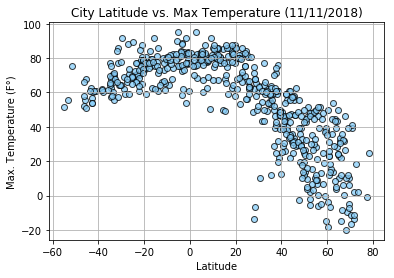

In [27]:
# Build a scatter plot for Lat & Max Temp
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], c='lightskyblue', marker='o',edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Max Temperature (11/11/2018)")
plt.ylabel("Max. Temperature (F°)")
plt.xlabel("Latitude")
plt.grid(True)

# Save image
plt.savefig("output_data/Latitude_vs_Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

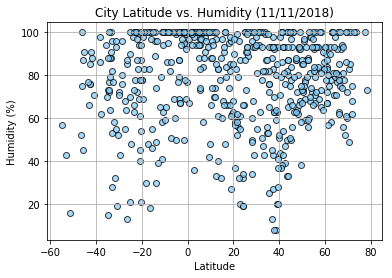

In [28]:
# Build a scatter plot for Lat & Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], c='lightskyblue', marker='o',edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Humidity (11/11/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save image
plt.savefig("output_data/Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

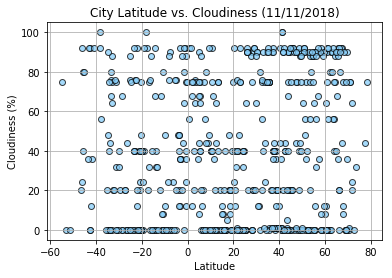

In [29]:
# Build a scatter plot for Lat & Cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], c='lightskyblue', marker='o',edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Cloudiness (11/11/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save image
plt.savefig("output_data/Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

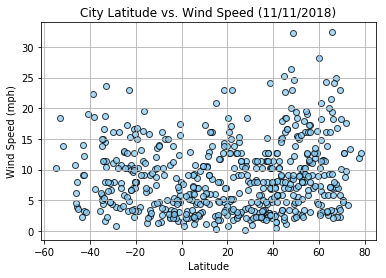

In [30]:
# Build a scatter plot for Lat & Wind Speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"],  c='lightskyblue', marker='o',edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Wind Speed (11/11/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save image
plt.savefig("output_data/Latitude_vs_Wind_Speed.png")

# Show plot
plt.show()